In [47]:
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

# save the final model to file
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import pandas as pd
import io
from PIL import Image
import numpy as np
 

# load train and test dataset
def load_dataset():
	# load dataset
	train_df = pd.read_parquet("../datasets/FashionMNIST/train.parquet")
	test_df = pd.read_parquet("../datasets/FashionMNIST/test.parquet")

	trainX = []
	trainY = []

	for i in range(train_df.shape[0]):
		image = Image.open(io.BytesIO(train_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		trainX.append(img_array)
		trainY.append(train_df["label"].iloc[i])
		
	trainX = np.array(trainX)
	trainY = np.array(trainY)

	testX = []
	testY = []

	for i in range(test_df.shape[0]):
		image = Image.open(io.BytesIO(test_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		testX.append(img_array)
		testY.append(test_df["label"].iloc[i])

	testX = np.array(testX)
	testY = np.array(testY)

	# (trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
	# save model
	model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()

Epoch 1/10
1875/1875 - 48s - 26ms/step - accuracy: 0.8238 - loss: 0.4813
Epoch 2/10
1875/1875 - 51s - 27ms/step - accuracy: 0.8839 - loss: 0.3147
Epoch 3/10
1875/1875 - 51s - 27ms/step - accuracy: 0.8997 - loss: 0.2711
Epoch 4/10
1875/1875 - 49s - 26ms/step - accuracy: 0.9083 - loss: 0.2443
Epoch 5/10
1875/1875 - 52s - 28ms/step - accuracy: 0.9169 - loss: 0.2220
Epoch 6/10
1875/1875 - 49s - 26ms/step - accuracy: 0.9234 - loss: 0.2051
Epoch 7/10
1875/1875 - 53s - 28ms/step - accuracy: 0.9275 - loss: 0.1907
Epoch 8/10
1875/1875 - 50s - 26ms/step - accuracy: 0.9330 - loss: 0.1776
Epoch 9/10
1875/1875 - 52s - 28ms/step - accuracy: 0.9384 - loss: 0.1642
Epoch 10/10
1875/1875 - 50s - 27ms/step - accuracy: 0.9429 - loss: 0.1504


In [48]:

# evaluate the deep model on the test dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
 
# load train and test dataset
def load_dataset():
	# load dataset

	train_df = pd.read_parquet("../datasets/FashionMNIST/train.parquet")
	test_df = pd.read_parquet("../datasets/FashionMNIST/test.parquet")

	trainX = []
	trainY = []

	for i in range(train_df.shape[0]):
		image = Image.open(io.BytesIO(train_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		trainX.append(img_array)
		trainY.append(train_df["label"].iloc[i])
		
	trainX = np.array(trainX)
	trainY = np.array(trainY)

	testX = []
	testY = []

	for i in range(test_df.shape[0]):
		image = Image.open(io.BytesIO(test_df["image"].iloc[i]['bytes']))
		img_array = np.array(image)
		testX.append(img_array)
		testY.append(test_df["label"].iloc[i])

	testX = np.array(testX)
	testY = np.array(testY)

	# (trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
 
# entry point, run the test harness
run_test_harness()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8943 - loss: 0.3151
> 89.830


In [8]:
# make a prediction for a new image.
from numpy import argmax
from keras.models import load_model
from PIL import Image
import pandas as pd
import io
import numpy as np
 
# load an image and predict the class
def run_example():
    test = pd.read_parquet("datasets/MNIST/test.parquet")
    image = Image.open(io.BytesIO(test["image"].iloc[100]['bytes']))
    img = np.array(image)
    img = img.reshape(1, 28, 28, 1)

    # load model
    model = load_model('final_model.h5')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)
 
# entry point, run the example
run_example()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
6


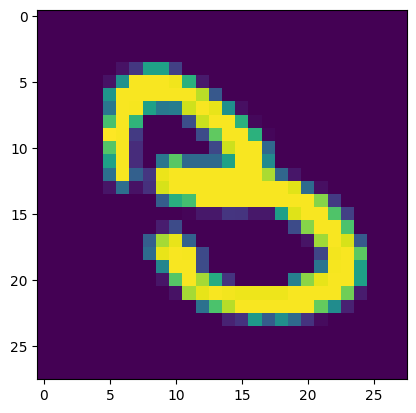

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import io

%matplotlib inline
test = pd.read_parquet("../datasets/MNIST/test.parquet")
image = Image.open(io.BytesIO(test["image"].iloc[18]['bytes']))
plt.imshow(image)

In [49]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix

import numpy as np

model = load_model('../Out/prima75scoreboard5/final_model.h5')
X = np.load('../Out/prima75scoreboard5/testdata.npz')
Y = np.load('../Out/prima75scoreboard5/testlabels.npz')
testX = X['data']
testY = Y['data']
# reshape dataset to have a single channel
testX = testX.reshape((testX.shape[0], 28, 28, 1))

y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(testY, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


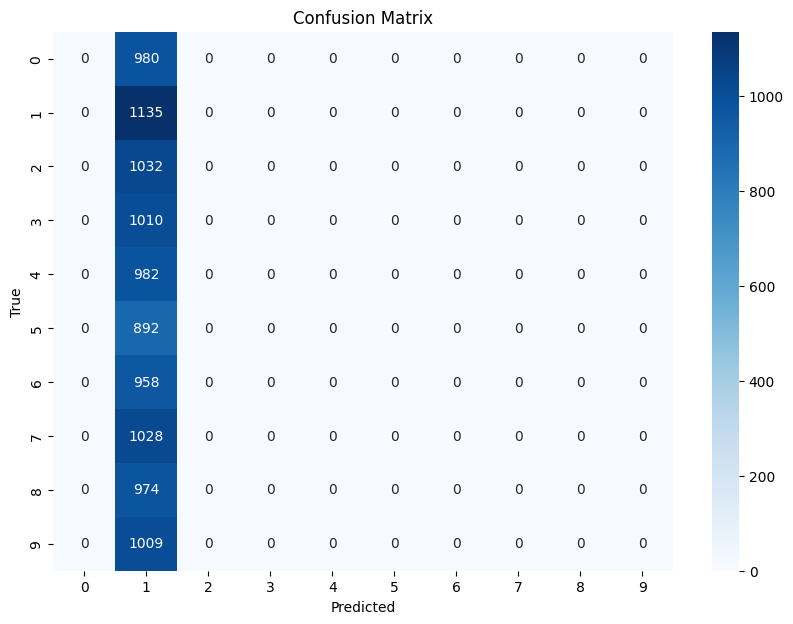

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Step 1: Create a boolean mask for mispredictions
mispredictions_mask = testY != y_pred_classes

# Step 2: Get the indices of mispredictions
misprediction_indices = np.where(mispredictions_mask)[0]

# Print the results
print(misprediction_indices)

[  18  115  247  321  340  445  449  582  646  659  684  740  774  900
  947  965 1014 1039 1112 1181 1226 1242 1247 1260 1319 1527 1549 1678
 1709 1721 1880 1901 1982 2035 2070 2098 2130 2135 2182 2266 2293 2387
 2414 2426 2447 2454 2462 2488 2648 2654 2743 2770 2915 2921 2927 2939
 2953 3060 3062 3073 3422 3520 3558 3756 3762 3767 3943 3985 4163 4176
 4224 4536 4571 4639 4740 4761 4807 4823 5265 5457 5654 5937 5955 5973
 6042 6065 6560 6571 6576 6597 7574 7928 8246 8408 8527 9009 9024 9540
 9587 9664 9679 9729 9770 9792 9839 9904]


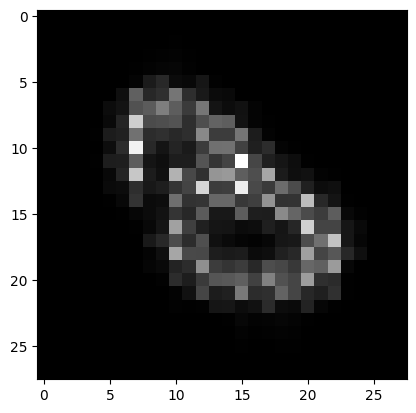

In [32]:
plt.imshow(testX[18], cmap='gray')